# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

# Regression Model: determine the effects of Credit Rating

In [98]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

In [100]:
# import credit from data folder: get working directory

# get wd
os.getcwd()


'/Users/alexyerg/Desktop/Johns Hopkins/MLNN/mlnn-main/05'

### Import/Explore data

In [120]:
# import credit data
credit = pd.read_csv('/Users/alexyerg/Desktop/Johns Hopkins/MLNN/mlnn-main/data/Credit.csv')

# Explore data 
credit.isnull().sum() # check for null values: NO nulls
credit.describe() # see summary stats
credit.info() # see data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [137]:
credit.describe() 

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


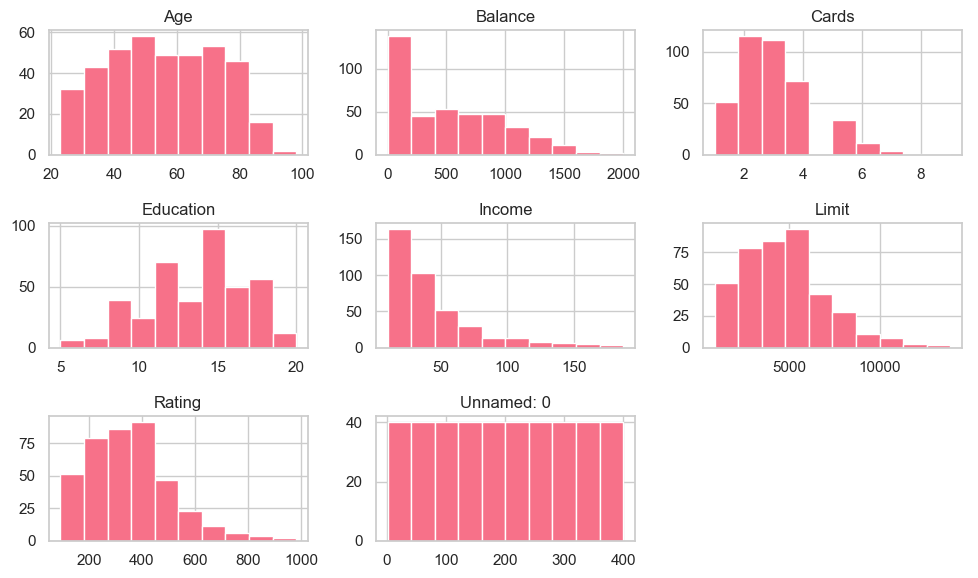

In [121]:
# Check Distribution of numeric variables
credit.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [139]:
# Check Distribution of numeric variables
# credit.boxplot(figsize=(8, 6))
# plt.tight_layout()
# plt.show()

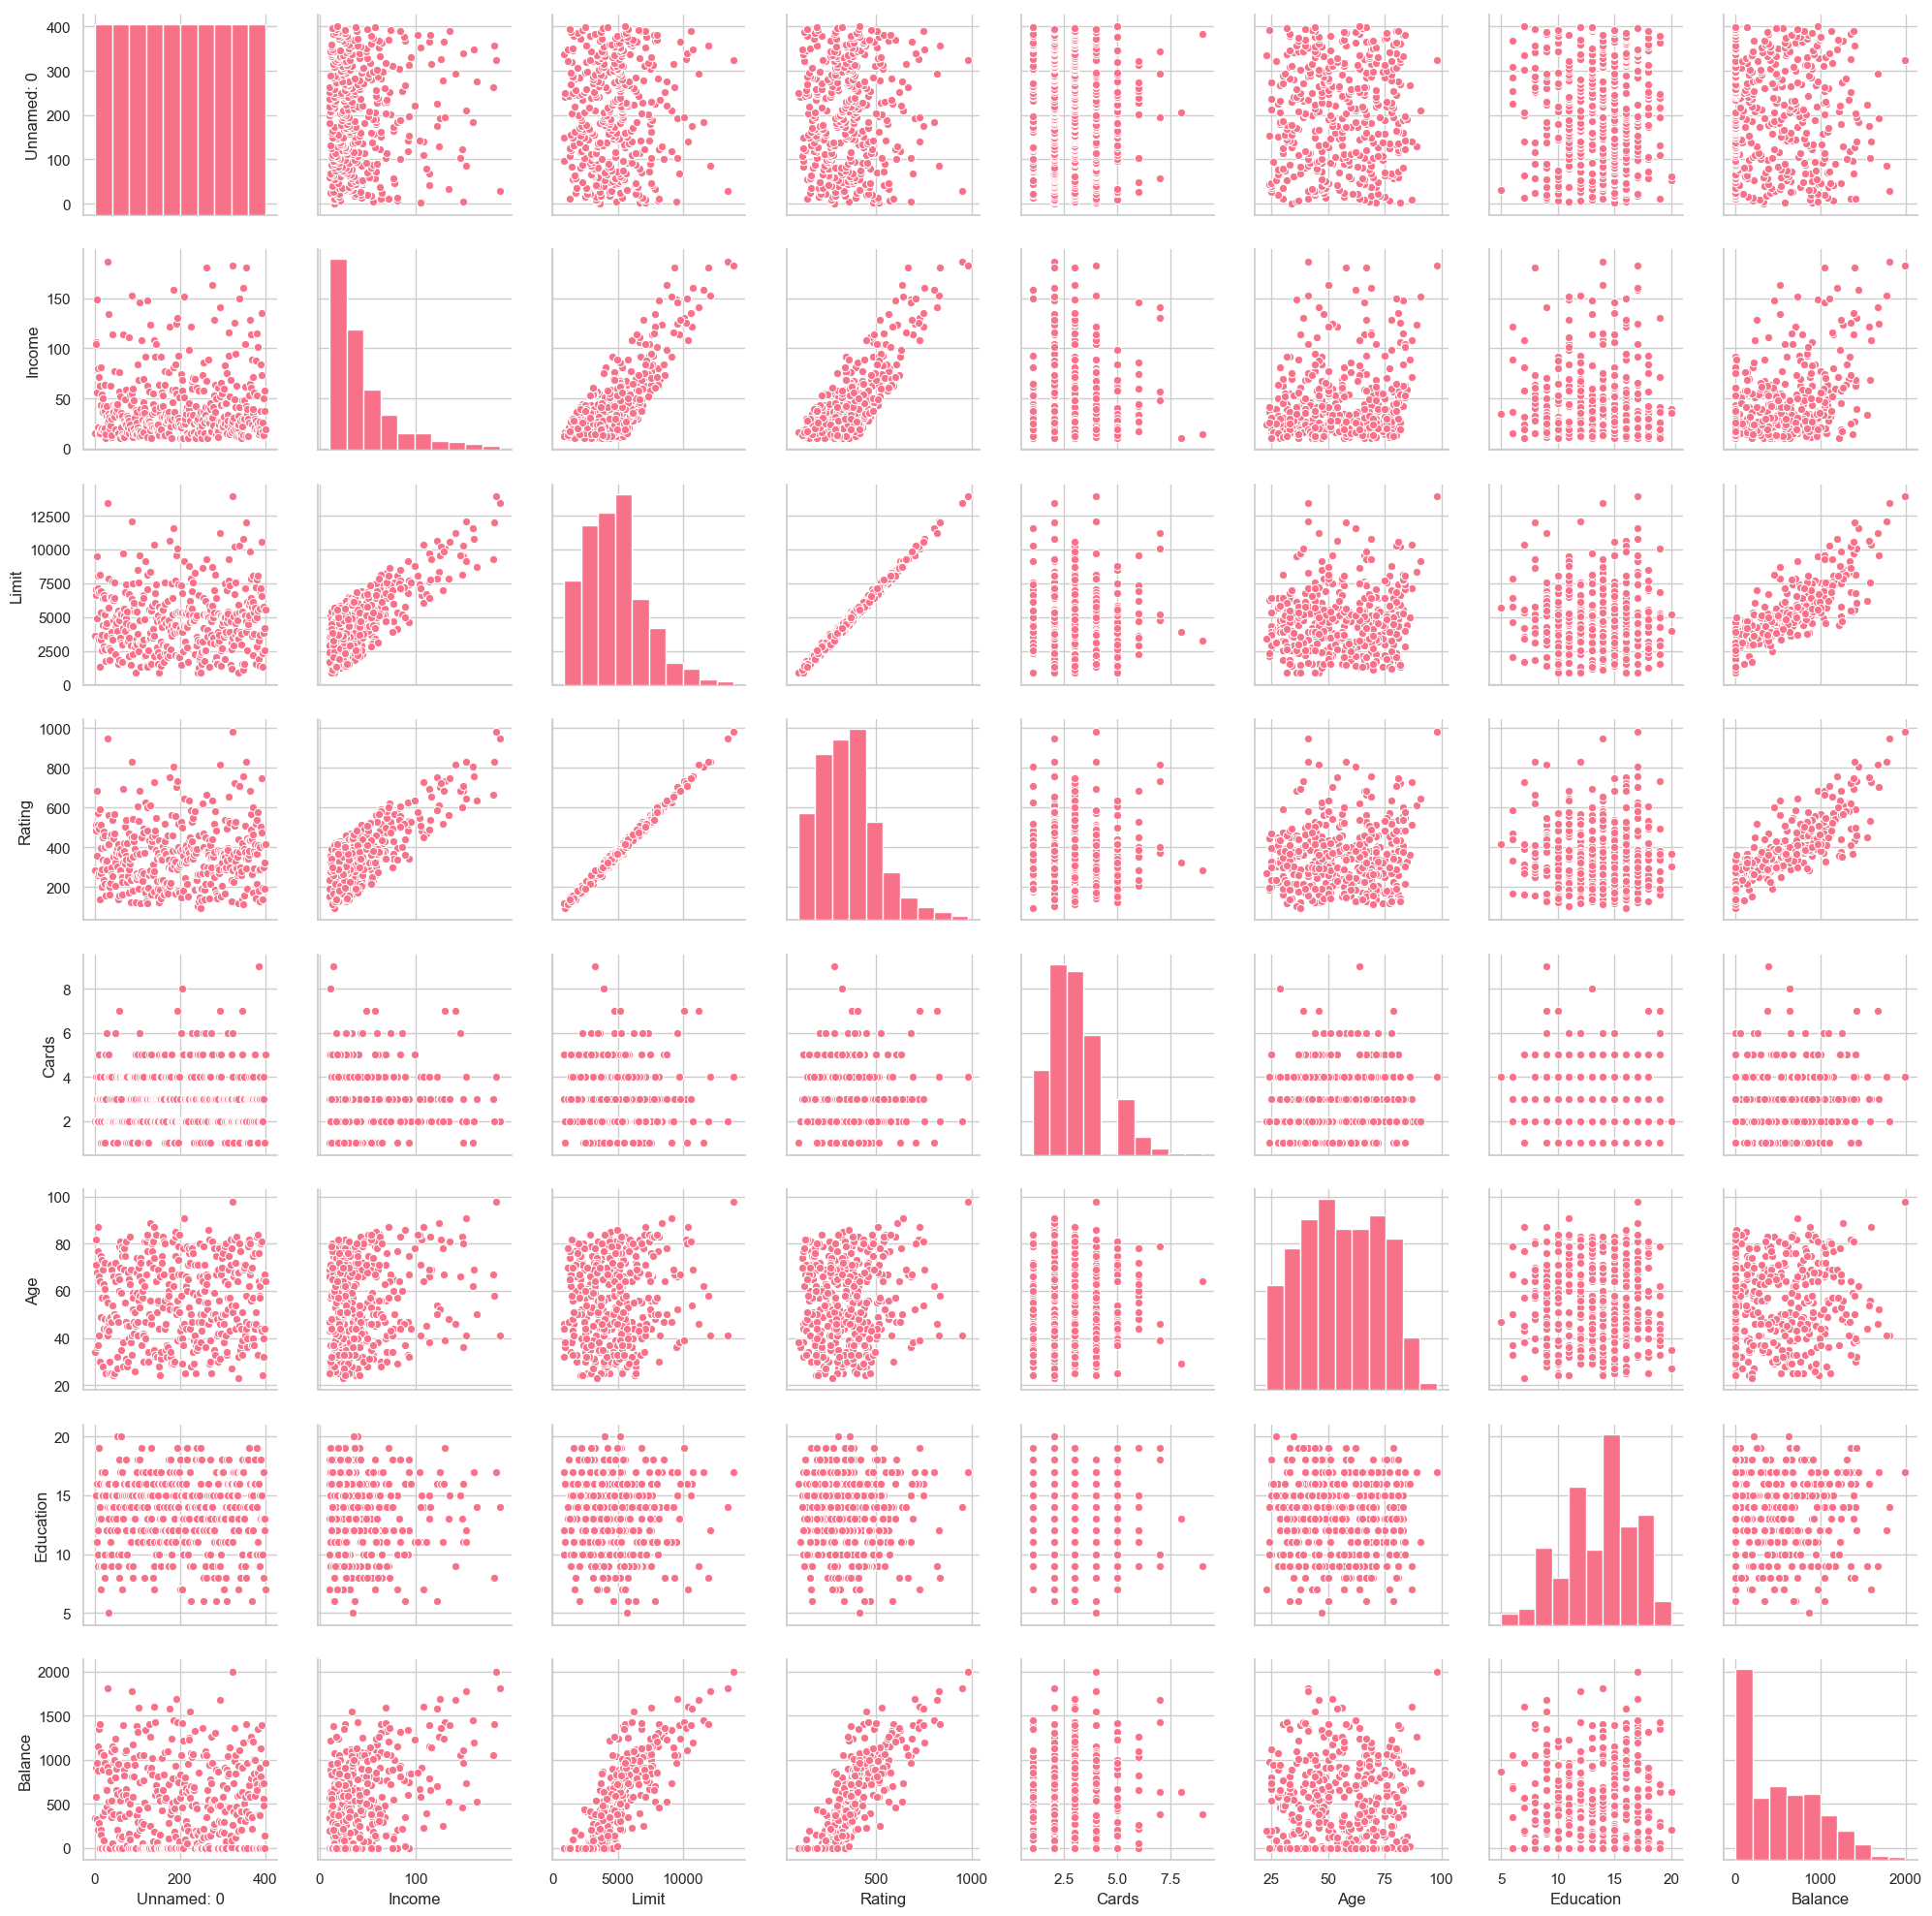

In [126]:
# check distribution and collinearity
sns.pairplot(credit)
plt.show()

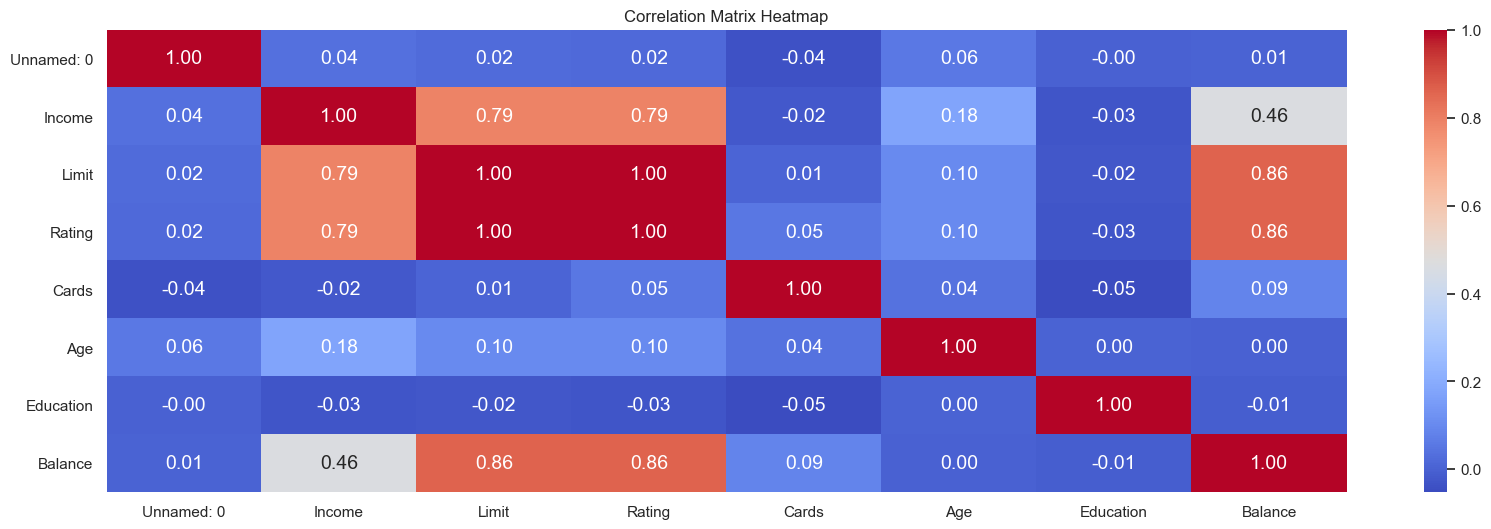

In [123]:
# check for perfect collinearity: Limit is perfectly collinear to Rating
correlation_matrix = credit.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

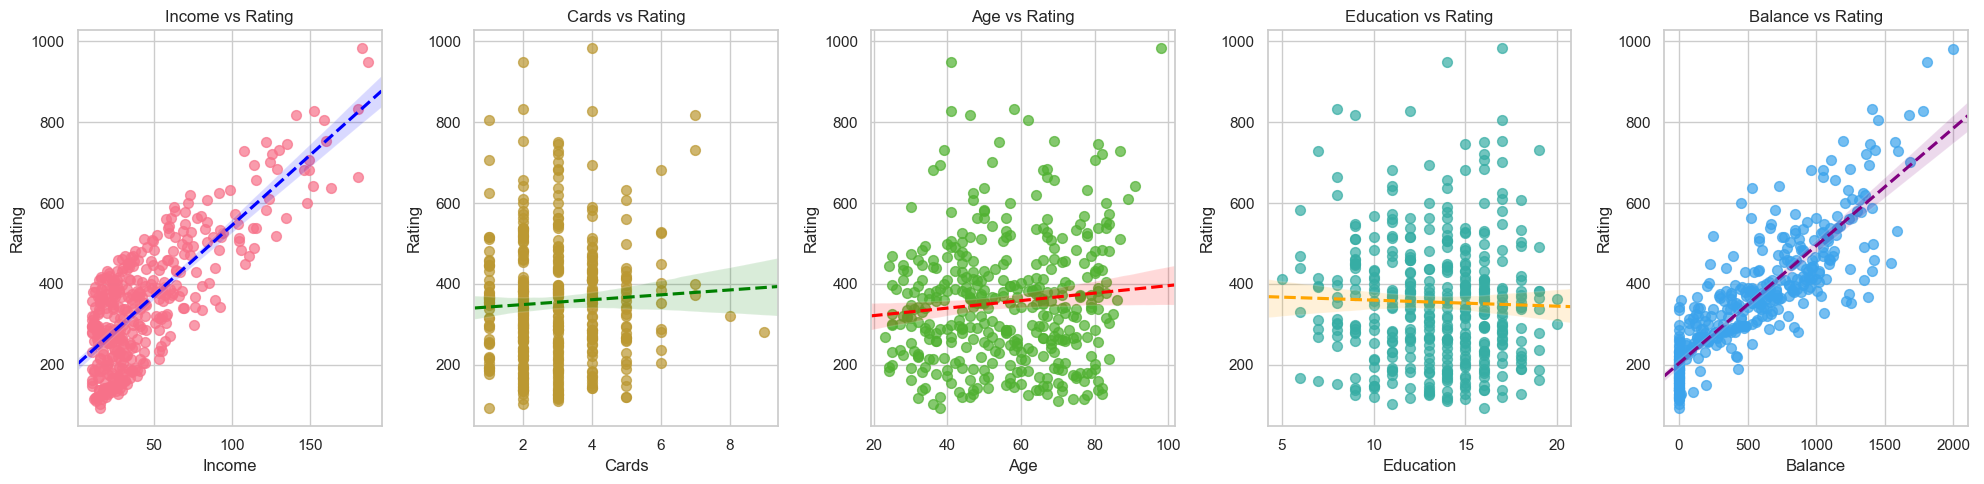

In [133]:
# Plot relationships between each indep variable to dep var

# set format
sns.set(style="whitegrid")
sns.set_palette("husl")

# create list of var and colors
independent_vars = ['Income', 'Cards', 'Age', 'Education', 'Balance']
colors = ['blue', 'green', 'red', 'orange', 'purple']

# set subplot sizes
fig, axes = plt.subplots(1, len(independent_vars), figsize=(20, 5))

# iterate 
for i, var in enumerate(independent_vars):
    sns.regplot(x=var, y='Rating', data=credit, scatter_kws={'alpha': 0.7, 's': 50},
                line_kws={'color': colors[i], 'linestyle': '--'}, ax=axes[i])
    
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Rating')
    axes[i].set_title(f'{var} vs Rating')

# show
plt.tight_layout()
plt.show()


### Setup Model using Linear Regression: Determine what effects Credit Rating using only numeric variables

In [135]:
# Extract features and target from df
# ! NOTE: Excluded the variable Limit due to being perfectly collinear
X = credit[['Income', 'Cards', 'Age', 'Education', 'Balance']]  # Independent variables
y = credit['Rating']  # Dependent variable

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# print the coefficients
print(linreg.intercept_, linreg.coef_)

143.56482237053734 [ 2.16820623  0.52335208  0.15423969 -0.72490883  0.21647112]


### Interpretation of Coefficients

Based on the coefficients from our regression model, for every $1k dollars increase results in an Credit Rating increase of ~2.17; for every additional credit card results in an increase in Credit Rating of ~0.52; for every 1 year older results in a rating increase of 0.15; for every additional year of education results in a decrease of rating by ~0.72; and for every 1 dollar in (checking or savings?) account results in a 0.216 rating increase.  

### Evaluate Model

In [138]:
# Predict on the training and testing data
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Calculate training and testing errors using MAE and MSE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MAE: 29.935380769894117
Testing MAE: 28.80386921282054
Training MSE: 1416.0692797732595
Testing MSE: 1400.2921073828772


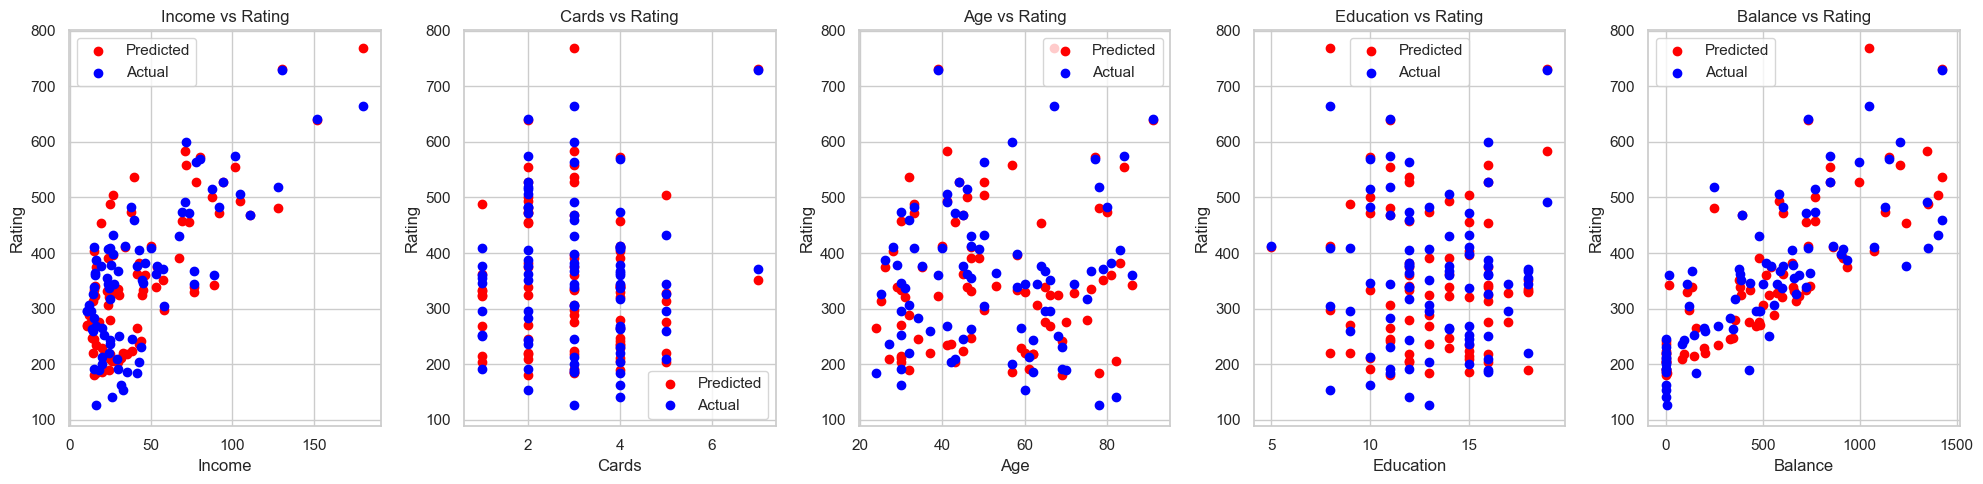

In [141]:
# Evaluate the model visually

sns.set(style="whitegrid")
sns.set_palette("husl")

# create list of independent variables
independent_vars = ['Income', 'Cards', 'Age', 'Education', 'Balance']

# set subplot sizes
fig, axes = plt.subplots(1, len(independent_vars), figsize=(20, 5))

# iterate through independent variables
for i, var in enumerate(independent_vars):
    # scatter plot: model (red)
    axes[i].scatter(X_test[var], y_test_pred, c='red', label='Predicted')

    # scatter plot: actual (blue)
    axes[i].scatter(X_test[var], y_test, c='blue', label='Actual')

    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Rating')
    axes[i].set_title(f'{var} vs Rating')
    axes[i].legend()

# show
plt.tight_layout()
plt.show()

# Classification Model (Decision Tree): using Credit data, determine if the consumer will be married

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

### Train & Fit Decision Tree Classifier: target = Married

In [154]:
# prep the data
X_clf = credit[['Income', 'Cards', 'Age', 'Education', 'Balance', 'Rating']]  # numeric features 
y_clf = credit['Married']  # target 

# train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# create/fit model: Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)

### Evaluate the Model: Classification Report, Confusion Matrix, Accuracy Score

In [157]:
# Classification Report
y_pred_clf = clf.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

          No       0.33      0.43      0.38        28
         Yes       0.64      0.54      0.58        52

    accuracy                           0.50        80
   macro avg       0.48      0.48      0.48        80
weighted avg       0.53      0.50      0.51        80



In [159]:
# Confustion Matrix
confusion_matrix(y_test_clf, y_pred_clf)

array([[12, 16],
       [24, 28]])

In [160]:
# Accuracy Score
accuracy_score(y_test_clf, y_pred_clf)

0.5

In [108]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Breast Cancer                                                                           14    
Breast Cancer Wisconsin (Original)                                                      15    
Breast Cancer Wisconsin (Progno

45
303
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 
   demographic                                        description  \
0          Age                                               None   
1          Sex                          

In [107]:
# import Heart dataset
heart = pd.read_csv('/Users/alexyerg/Desktop/Johns Hopkins/MLNN/mlnn-main/data/Heart.csv')
heart.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [112]:
urls = ['../data/KDCA-201601.csv', '../data/KDCA-201602.csv', '../data/KDCA-201603.csv']
frames = [pd.read_csv(url) for url in urls]
weather = pd.concat(frames)
cols = 'WBAN	Date	Time	StationType	SkyCondition	Visibility	WeatherType	DryBulbFarenheit	DryBulbCelsius	WetBulbFarenheit	WetBulbCelsius	DewPointFarenheit	DewPointCelsius	RelativeHumidity	WindSpeed	WindDirection	ValueForWindCharacter	StationPressure	PressureTendency	PressureChange	SeaLevelPressure	RecordType	HourlyPrecip	Altimeter'
cols = cols.split()
weather = weather[cols]
weather['datetime'] = pd.to_datetime(weather.Date.astype(str) + weather.Time.apply('{0:0>4}'.format))
weather['datetime_hour'] = weather.datetime.dt.floor(freq='h')
weather['month'] = weather.datetime.dt.month
weather

,WBAN,Date,Time,StationType,SkyCondition,Visibility,WeatherType,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,...,StationPressure,PressureTendency,PressureChange,SeaLevelPressure,RecordType,HourlyPrecip,Altimeter,datetime,datetime_hour,month
0,13743,20160101,52,11,BKN046 OVC250,10.0,,44,6.7,39,...,30.09,,,30.15,AA,,30.16,2016-01-01 00:52:00,2016-01-01 00:00:00,1
1,13743,20160101,152,11,FEW045 BKN230,10.0,,42,5.6,38,...,30.08,,,30.14,AA,,30.15,2016-01-01 01:52:00,2016-01-01 01:00:00,1
2,13743,20160101,252,11,FEW045 BKN220,10.0,,42,5.6,38,...,30.09,,,30.15,AA,,30.16,2016-01-01 02:52:00,2016-01-01 02:00:00,1
3,13743,20160101,352,11,BKN220,10.0,,42,5.6,37,...,30.07,,,30.14,AA,,30.14,2016-01-01 03:52:00,2016-01-01 03:00:00,1
4,13743,20160101,452,11,BKN180 OVC230,10.0,,42,5.6,37,...,30.07,,,30.14,AA,,30.14,2016-01-01 04:52:00,2016-01-01 04:00:00,1
5,13743,20160101,552,11,OVC210,10.0,,42,5.6,37,...,30.07,,,30.14,AA,,30.14,2016-01-01 05:52:00,2016-01-01 05:00:00,1
6,13743,20160101,652,11,OVC200,10.0,,41,5.0,36,...,30.08,,,30.15,AA,,30.15,2016-01-01 06:52:00,2016-01-01 06:00:00,1
7,13743,20160101,752,11,OVC210,10.0,,41,5.0,36,...,30.08,,,30.15,AA,,30.15,2016-01-01 07:52:00,2016-01-01 07:00:00,1
8,13743,20160101,852,11,BKN160 OVC210,10.0,,41,5.0,36,...,30.09,,,30.16,AA,,30.16,2016-01-01 08:52:00,2016-01-01 08:00:00,1
9,13743,20160101,952,11,BKN160 OVC210,10.0,,42,5.6,37,...,30.1,,,30.16,AA,,30.17,2016-01-01 09:52:00,2016-01-01 09:00:00,1


In [105]:
# import Bikeshare data from kaggle

# df_train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
# df_test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')

# df = pd.concat([df_train, df_test], axis = 0)


In [47]:
#pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing_dataset = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing_dataset.data.features 
y = bike_sharing_dataset.data.targets 

# panda df of features and target
Xy = X.join(y)

df.iloc[:, [0] + list(range(-4, 0))]
# metadata 
#print(bike_sharing_dataset.metadata) 
  
# variable information 
# print(bike_sharing_dataset.variables) 


X_weather = X[['atemp','hum','windspeed']]

In [21]:
print(X.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')


In [33]:

X_weather = X[['atemp','hum','windspeed']]
X_atemp = X_weather['atemp']
X_hum = X_weather['hum']
X_windspeed = X_weather['windspeed']
print(X_weather.columns)

Index(['atemp', 'hum', 'windspeed'], dtype='object')


### Wrangle data and prep for Linear Reg

In [89]:
# Group by day and summarize by avg weather features, and sum total counts of rentals
df_tbl = df.groupby('dteday').agg({'atemp': 'mean', 'hum': 'mean', 'windspeed': 'mean', 'cnt': 'sum'})

df_tbl['dteday'] = pd.to_datetime(df_tbl['dteday'])

KeyError: 'dteday'

In [57]:

# print(type(bike_sharing_dataset))

#bike_sharing_df = pd.DataFrame(bike_sharing_dataset)

#type(X_weather)
# bike_sharing_dataset.data.features

#X_weather
#Xy

# keep atemp, hum, windspeed, cnt
df = Xy.iloc[:, [0] + list(range(-4, 0))]
df

,dteday,atemp,hum,windspeed,cnt
0,2011-01-01,0.2879,0.81,0.0000,16
1,2011-01-01,0.2727,0.80,0.0000,40
2,2011-01-01,0.2727,0.80,0.0000,32
3,2011-01-01,0.2879,0.75,0.0000,13
4,2011-01-01,0.2879,0.75,0.0000,1
5,2011-01-01,0.2576,0.75,0.0896,1
6,2011-01-01,0.2727,0.80,0.0000,2
7,2011-01-01,0.2576,0.86,0.0000,3
8,2011-01-01,0.2879,0.75,0.0000,8
9,2011-01-01,0.3485,0.76,0.0000,14


In [12]:
# import bikeshare
bikes = pd.read_csv('../data/bikeshare.csv.gz')
#bikes.head()
# bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
# bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
# bikes["dur"] = (bikes['Duration (ms)']).astype(int)
# bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)
# bikes.head()

np.shape(bikes)

(552399, 9)

In [88]:

 sns.scatterplot(data = df_tbl, x='dteday', y='cnt')

ValueError: Could not interpret input 'dteday'

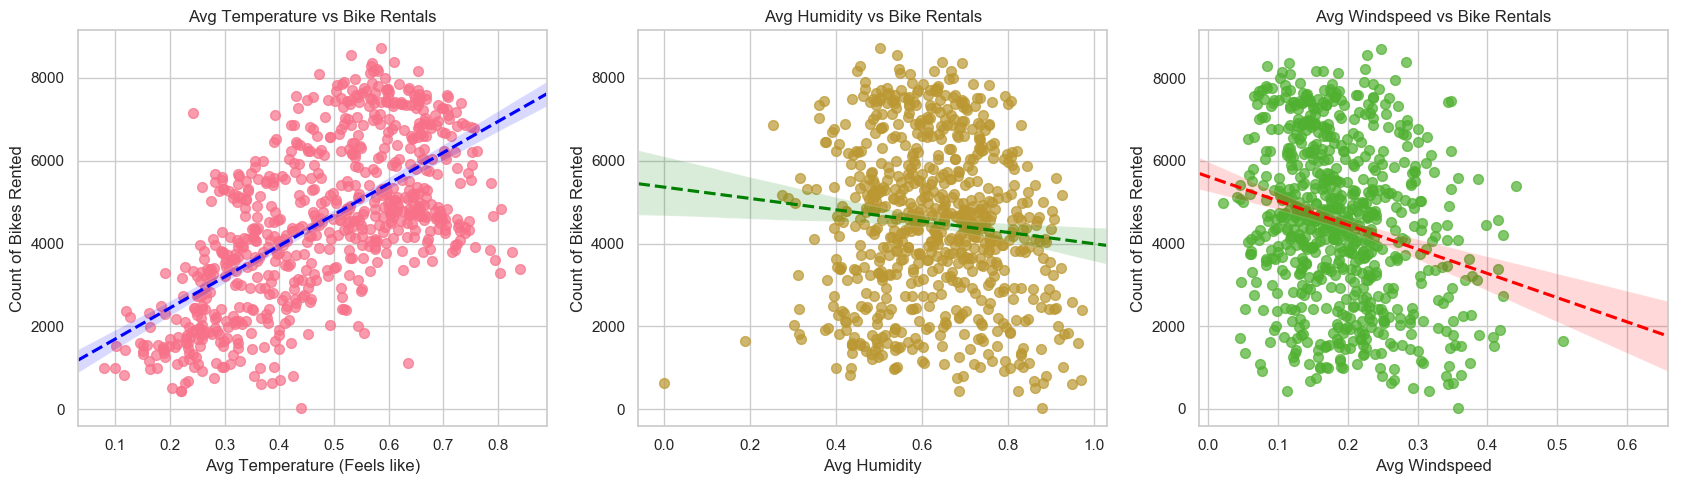

In [87]:

# sns.scatterplot(data = df, x='atemp', y='cnt').set_title('Feature1 vs Target')
# sns.scatterplot(data = df_tbl, x='atemp', y='cnt').set_title('Feature1 vs Target')

# style and color palette
sns.set(style="whitegrid")
sns.set_palette("husl")

# Create three separate lmplots with unique features
fig, axes = plt.subplots(1, 3, figsize=(17, 5))  # Create a figure with 3 subplots

# Plot: Relationship between 'atemp' and 'cnt'
sns.regplot(x='atemp', y='cnt', data=df_tbl, scatter_kws={'alpha':0.7, 's':50}, line_kws={'color':'blue', 'linestyle':'--'}, ax=axes[0])
axes[0].set_xlabel('Avg Temperature (Feels like)')
axes[0].set_ylabel('Count of Bikes Rented')
axes[0].set_title('Avg Temperature vs Bike Rentals')

# Plot: Relationship between 'hum' and 'cnt' 
sns.regplot(x='hum', y='cnt', data=df_tbl, scatter_kws={'alpha':0.7, 's':50}, line_kws={'color':'green', 'linestyle':'--'}, ax=axes[1])
axes[1].set_xlabel('Avg Humidity')
axes[1].set_ylabel('Count of Bikes Rented')
axes[1].set_title('Avg Humidity vs Bike Rentals')

# Plot: Relationship between 'windspeed' and 'cnt'
sns.regplot(x='windspeed', y='cnt', data=df_tbl, scatter_kws={'alpha':0.7, 's':50}, line_kws={'color':'red', 'linestyle':'--'}, ax=axes[2])
axes[2].set_xlabel('Avg Windspeed')
axes[2].set_ylabel('Count of Bikes Rented')
axes[2].set_title('Avg Windspeed vs Bike Rentals')

# Display the plots
plt.tight_layout()
plt.show()


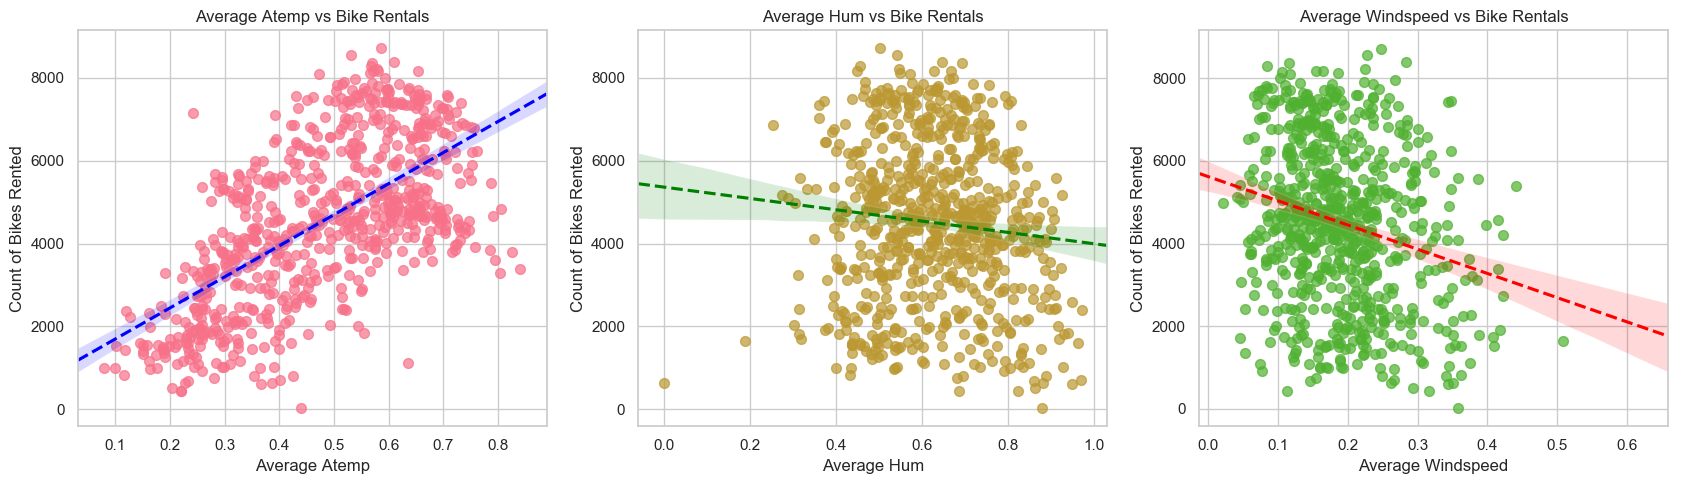

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Style and color palette
sns.set(style="whitegrid")
sns.set_palette("husl")

# Define the features and corresponding colors
features = ['atemp', 'hum', 'windspeed']
colors = ['blue', 'green', 'red']

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Loop through the features and create the plots
for i, feature in enumerate(features):
    # Plot relationship between the current feature and 'cnt'
    sns.regplot(x=feature, y='cnt', data=df_tbl, scatter_kws={'alpha':0.7, 's':50},
                line_kws={'color': colors[i], 'linestyle': '--'}, ax=axes[i])
    
    # Set labels and title for the current subplot
    axes[i].set_xlabel(f'Average {feature.capitalize()}')
    axes[i].set_ylabel('Count of Bikes Rented')
    axes[i].set_title(f'Average {feature.capitalize()} vs Bike Rentals')

# Display the plots
plt.tight_layout()
plt.show()

In [26]:
X_weather

,atemp,hum,windspeed
0,0.2879,0.81,0.0000
1,0.2727,0.80,0.0000
2,0.2727,0.80,0.0000
3,0.2879,0.75,0.0000
4,0.2879,0.75,0.0000
5,0.2576,0.75,0.0896
6,0.2727,0.80,0.0000
7,0.2576,0.86,0.0000
8,0.2879,0.75,0.0000
9,0.3485,0.76,0.0000


In [23]:
y

,cnt
0,16
1,40
2,32
3,13
4,1
5,1
6,2
7,3
8,8
9,14


In [93]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Assuming 'X' contains your features and 'y' contains your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_weather, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linreg = LinearRegression()

# Fit the model on the training data
linreg.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Calculate training and testing errors using MAE and MSE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MAE: 117.76110272007637
Testing MAE: 114.84087717173631
Training MSE: 24859.673664502687
Testing MSE: 23416.71771303452


In [94]:
# print the coefficients
print(linreg.intercept_, linreg.coef_)

[163.87037327] [[ 406.11977333 -278.27510187   41.0966121 ]]
